I have mainly made this notebook to explain different parts of the code I have developped and to include some visualizations of use case examples.

# What is Battleship Game?

Battleship is a strategy game for two players. Each player owns many ships, tries to guess the positions of the opponent ones and destroy them by choosing the cells to hit one by one. The objective of the game is to destroy the opposing player's ships.

<center><img src="images/Battleship_game_board.png" width="240" height="240"><br>
Figure 1: Battleship board. Fired cell are crossed and ships are represented by grey cells (source: Wikipedia).</center>

# About this implementation
I have developped a script for this game, which can be used in two different ways. The first one consistes of playing the game and the second use case is to generate data related to the game progress. I will explain in more details the 2 use cases.
## Playing or Simulating the Game
This part consists of playing against the computer. Two ships are randomly placed in a field and a human user has to find the ships positions after a minimum number of guess. Another game mode consists of simulating and visualizing a game where the computer has also to destroy randomly placed ships.
## Genarating Data
This use case consists of generating and prepare data which can be used as a machine learning model. The main idea of this part is to simulate many games and save the state set of each one as well as the output of each action, i.e., whether it was a good move or not.

# Code Design and Classes

## Design

As we can see in the `tree` function output, there are four main directoris: `src` which contains the implementations of the main programs, `data` used to save generated data and `tests` for testing functionalities. The `images` directory is used for the images used in this notebook.

In [10]:
! tree --dirsfirst -L 2

.
├── data
│   ├── generated_data_X_1000.npy
│   └── generated_data_y_1000.npy
├── images
│   ├── Battleship_game_board.png
│   └── Simulated_game.png
├── src
│   ├── __pycache__
│   ├── Battleship.py
│   ├── generate_data.py
│   ├── play.py
│   └── simulate.py
├── tests
├── Battleship.ipynb
├── LICENSE
├── README.md
└── requirements.txt

5 directories, 12 files


## Classes

Le me describe at a high level the implemented classes in `Battleship` module from general to specific. The `Battleship` class is used to create the main game instance. It initializes and updates all the game parameters and object such as the field, the number and positions of the ships, etc. This class can be used to play or simulate games, as well as generate data and show game-related visualizations. The second class is `Field` which represents the grid that will be used for the game. It contains `Ship` instances and composed of `Cell`'s.

# Game Initialization
When creating a `Battleship` instance, a field is initialized with the size parameter given (default is $10\times10$), then the ships are created and randomply placed in the fields. Ships can only be vertical or horizontal, and can't be superposed (i.e., have common cells). For each ship, one initial cell is randomly chosen from the free cells of the field. Then a random direction is picked (e.g., for verical orientation, $+1$ is buttom and $-1$ is up). Finally, if the ship is inside the field it's placed otherwise the direction is changed.

In [1]:
# imports
import random
import matplotlib.pyplot as plt

from src.Battleship import Battleship

%matplotlib inline

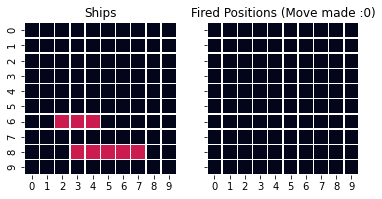

In [76]:
# create a Battleship instance and show the ships
bs = Battleship()

f, axarr = plt.subplots(1, 2, sharex=True, sharey=True)
axarr[0].set_title("Ships")
axarr[1].set_title("Fired Positions")
for ax in axarr:
    ax.set(adjustable='box', aspect='equal')
bs.showState(f, axarr)

# Game Process

Let's try to fire some cells and show the results. We will fire one random free cell and one random cell occupied by a ship.

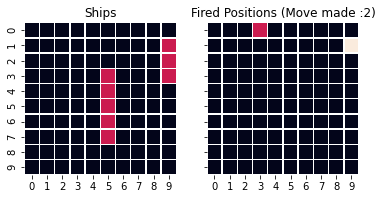

Now the fire count is 2.


In [9]:
free_cell = random.choice(bs.field.free_cells)
occupied_cell = random.choice(bs.field.occupied_cells)

bs.fireCell(free_cell)
bs.fireCell(occupied_cell)

bs.showState(f=None, axarr=None)
print("Now the fire count is {}.".format(bs.fire_count))

As we can see, the occupied cell is now fired and shown in different color so the player know that there is a ship out there. This process is repeated while playing or simulating a game until all the ships are destroyed.

# Game Simulation
Let's try the game simulator. This will simulate one game where a dumb player is randomly choosing cells to fire. The float argument given to the `simulate` function is the figure update rate (in seconds). The `%matplotlib` magic is added to show the process in a new window.

In [9]:
%matplotlib

bs = Battleship()
bs.simulate(update_rate=0.01)

Using matplotlib backend: Qt5Agg
Simulating ...Finished after 98 moves.


<center><img src="images/Simulated_game.png" height="240"><br>
Figure 2: a simulated game in progress.</center>

# Generate Data
In this part, I will use the data generation part to get the input for an ML model. This is similar to the simulation part, but with saving data functionality. Data will be saved on disk so it can be imported used later. The default directory to save data is `data/`.